<a href="https://colab.research.google.com/github/Aleena-Mishra-10/Project/blob/main/Handwritten_Digit_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
digits=datasets.load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [3]:
print('Size of the dataset',len(digits.target))

Size of the dataset 1797


In [4]:

digits.target

array([0, 1, 2, ..., 8, 9, 8])

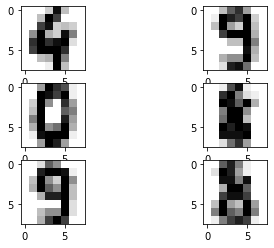

In [5]:
plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r,
interpolation='nearest')


In [6]:
from sklearn.svm import SVC
model=SVC()
from sklearn.model_selection import GridSearchCV
model1=GridSearchCV(model,param_grid={'kernel':['rbf','linear','poly'],'C':[0.4,0.6,0.8,1]},cv=5)
model1.fit(digits.data[1:1257],digits.target[1:1257])

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.4, 0.6, 0.8, 1],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [7]:
model1.best_params_

{'C': 0.8, 'kernel': 'poly'}

In [9]:
model2=SVC(kernel='poly',C=0.8)
model2.fit(digits.data[1:1257],digits.target[1:1257])

SVC(C=0.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

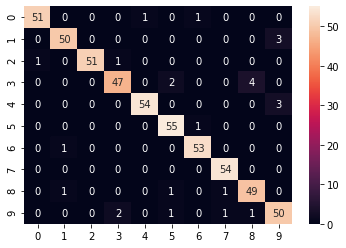

In [10]:
y_pred=model2.predict(digits.data[1257:1797])
y_true=digits.target[1257:1797]
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
sns.heatmap(cm,annot=True)

In [12]:
#Now let's chcek out accuracy
print('Test set score is\n',model2.score(digits.data[1257:1797],digits.target[1257:1797]))

Test set score is
 0.9518518518518518
